# Cell Types Project
*Replace this with the name of your project*

## Team Member Names & Contributions
*Feel free to name your team, but please also include your real names and IDs here. Please specify who in your group worked on which parts of the project.*

- **Captain Marvel**: You know, blowing up things and such.
- **Ant Man**: Cleverly sneaking into small spaces
- **Hulk**: AKA The "Muscle"

## Abstract

*Fill in your 3-4 sentence abstract here*

## Research Question

*Fill in your research question here*

# Background and Prior Work

*Fill in your background and prior work here (~500 words). You are welcome to use additional subheadings. You should also include a paragraph describing each dataset and how you'll be using them.* 

### References (include links):
(1)

(2)

## Hypothesis


*Fill in your hypotheses here*

# 1. Setup

In [40]:
import pandas as pd

import requests
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

# 2. Data Wrangling

## 2.1. Getting electrophysiological features of hippocampal pyramidal cells 

The Allen Software Development Kit (Allen SDK) is a source code for processing Allen Brain Atlas data, which includes the Cell Types Database. Electrophysiologcal characterizations of human neurons can be found in the Allen Cell Types. 

We can download the data from Allen Cell Types Database by importing the "Cell Types Cache" class, which will provide a Python interface for downloading data from the database. To access the database, we will then import CellTypesApi and initialize it as 'ctc'. 

In [6]:
from allensdk.core.cell_types_cache import CellTypesCache
from allensdk.api.queries.cell_types_api import CellTypesApi

The 'get_cells' method downloads the metadata of all cells in the databse. We will filter for human cells by specifying the species as 'HUMAN' and assign the output to 'human_cells'. 


In [7]:
ctc = CellTypesCache(manifest_file='cell_types/manifest.json')
human_cells = ctc.get_cells(species=[CellTypesApi.HUMAN])

Importing pandas allows us to visualize the data downloaded from the database in an organized manner by allowing the conversion of the human_cells output into a dataframe. 'pd.Dataframe' converts 'human_cells' to a Pandas dataframe. Our data will be organized by subject id by using the 'set_index' method to reassign the indices of the rows in our dataframe. 

In [8]:
# setting up a dataframe that contains only human cell information
human_df = pd.DataFrame(human_cells)
human_df = human_df.set_index('id')
human_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
525011903,None,"[273.0, 354.0, 216.0]",Homo Sapiens,H16.03.003.01.14.02,3,12113,FroL,,spiny,intact,None,epilepsy,524848408,right,NaN
528642047,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.06.05,5,12141,MTG,,aspiny,NA,None,epilepsy,528574320,left,NaN
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
596020931,None,"[66.0, 220.0, 105.0]",Homo Sapiens,H17.06.009.11.04.02,4,12141,MTG,,aspiny,NA,full,tumor,595954915,left,0.497825


Since our project is interestd in hippocampal spiny neurons, we want to focus on the values under the columns 'structure_area_abbrev' and 'dendrite type'. We want these columns to contain the values 'MTG' and 'spiny,' respectively. To filter through the dataframe, we can use boolean indexing. The following lines of codes makes new dataframes from the 'human_df' dataframe where the values under our two columns of interest equals the values we want.  

In [9]:
#First we made a new dataframe from 'human_df' with the 'structure_area_abbrev' containing all 'MTG' values
MTG_df = human_df[human_df['structure_area_abbrev']=='MTG']

#From MTG_df, we made a new dataframe with 'dendrite_type' colunn containing all 'spiny' values
MTG_spiny_df = MTG_df[MTG_df['dendrite_type']=='spiny']
MTG_spiny_df.head()

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,reconstruction_type,disease_state,donor_id,structure_hemisphere,normalized_depth
id,,,,,,,,,,,,,,,
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,None,epilepsy,536912860,right,NaN
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,full,epilepsy,518641172,left,0.290951
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,None,epilepsy,545510854,right,NaN
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,None,epilepsy,561414332,left,NaN
528706755,None,"[70.0, 260.0, 108.0]",Homo Sapiens,H16.06.009.01.01.15.01,2,12141,MTG,,spiny,intact,dendrite-only,epilepsy,528574320,left,0.134667


Now we need to get the electrophysiological properties data of the cells we're interested in. This can be done by using the 'get_ephys_feature()' method on the cell types cache instance we made earlier. Like before, we converted the output into a dataframe and set the 'specimen_id' column as the index of the dataframe. Indexing both of our dataframes with 'specimen_id' will allow us to merge the two dataframes together in the next step. 

In [10]:
ephys_features = pd.DataFrame(ctc.get_ephys_features()).set_index('specimen_id')
#We want to display column names so we know which column contains the data points we are intersted in later
ephys_features.head()

,adaptation,avg_isi,electrode_0_pa,f_i_curve_slope,fast_trough_t_long_square,fast_trough_t_ramp,fast_trough_t_short_square,fast_trough_v_long_square,fast_trough_v_ramp,fast_trough_v_short_square,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
specimen_id,,,,,,,,,,,,,,,,,,,,,
529878215,NaN,134.700000,22.697498,8.335459e-02,1.187680,13.295200,1.025916,-56.375004,-57.385420,-57.431251,...,13.295680,1.134780,-56.593754,-57.739586,-74.143753,3.029695,3.061646,2.969821,-80.468750,-73.553391
548459652,NaN,NaN,-24.887498,-3.913630e-19,1.099840,20.650105,1.025460,-54.000000,-54.828129,-54.656254,...,20.650735,1.160940,-55.406254,-55.242191,-73.500000,2.441895,2.245653,2.231575,-84.406258,-73.056595
579978640,0.009770,39.044800,-46.765002,5.267857e-01,1.157840,2.551310,1.025387,-59.500000,-58.234378,-59.940975,...,2.551960,1.089851,-60.062500,-58.570314,-61.371531,2.023762,2.162878,2.006406,-93.375008,-60.277321
439024551,-0.007898,117.816429,5.996250,1.542553e-01,1.989165,9.572025,1.028733,-47.531250,-50.359375,-65.500000,...,9.576308,1.423229,-49.406254,-52.718752,-75.273443,3.105931,3.491663,1.733896,-87.656250,-75.205559
515188639,0.022842,68.321429,14.910000,1.714041e-01,1.081980,2.462880,1.025620,-48.437504,-46.520837,-51.406253,...,2.490433,1.479690,-53.000004,-54.645837,-64.250003,3.285760,3.363504,4.234701,-81.625008,-63.474991


The two dataframes we have now are 'MTG_spiny_df' and 'ephys_features.' We are only interested in the data in 'ephys_features' that correspond with the specimen_id values in 'MTG_spiny_df.' Since we indexed both dataframes by specimen_id, we can combine the two dataframes into a new dataframe where only data entries with the same index values across the two dataframes are kept. 

In [11]:
MTGspiny_ephys_features = MTG_spiny_df.join(ephys_features)
print(MTGspiny_ephys_features.columns)
MTGspiny_ephys_features.head()

Index(['reporter_status', 'cell_soma_location', 'species', 'name',
       'structure_layer_name', 'structure_area_id', 'structure_area_abbrev',
       'transgenic_line', 'dendrite_type', 'apical', 'reconstruction_type',
       'disease_state', 'donor_id', 'structure_hemisphere', 'normalized_depth',
       'adaptation', 'avg_isi', 'electrode_0_pa', 'f_i_curve_slope',
       'fast_trough_t_long_square', 'fast_trough_t_ramp',
       'fast_trough_t_short_square', 'fast_trough_v_long_square',
       'fast_trough_v_ramp', 'fast_trough_v_short_square', 'has_burst',
       'has_delay', 'has_pause', 'id', 'input_resistance_mohm', 'latency',
       'peak_t_long_square', 'peak_t_ramp', 'peak_t_short_square',
       'peak_v_long_square', 'peak_v_ramp', 'peak_v_short_square',
       'rheobase_sweep_id', 'rheobase_sweep_number', 'ri', 'sag', 'seal_gohm',
       'slow_trough_t_long_square', 'slow_trough_t_ramp',
       'slow_trough_t_short_square', 'slow_trough_v_long_square',
       'slow_trough_v_r

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_ramp,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest
id,,,,,,,,,,,,,,,,,,,,,
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,5.694547,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,9.962780,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,...,22.069340,1.112633,-54.343754,-54.968751,-75.156258,3.675430,3.665890,3.586321,-78.500000,-74.496262
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,...,6.479140,1.174147,-60.312504,-57.989586,-71.020838,4.149998,3.667004,3.929834,-78.312500,-69.626610
528706755,None,"[70.0, 260.0, 108.0]",Homo Sapiens,H16.06.009.01.01.15.01,2,12141,MTG,,spiny,intact,...,10.173433,1.670800,-47.062500,-52.302085,-72.343750,2.806181,3.007196,2.592416,-82.593758,-72.490135


One of the electrophysiological features, average firing rate, could not be found in this dataset. Therefore, we will try to fetch the data online using RMA query functions.

In [13]:
# RMA for firing rate
service = "http://api.brain-map.org/api/v2/data/query.json?criteria="

specimen_id = list(MTGspiny_ephys_features.index)
avg_fr = []

for specimen in specimen_id:
    donor_result = requests.get("%smodel::ApiCellTypesSpecimenDetail, rma::criteria, \
    specimen[id$eq%s]" % (service, specimen)).json()
    avg_fr.append(donor_result['msg'][0]['ef__avg_firing_rate'])
    
    
MTGspiny_ephys_features['avg_fr'] = avg_fr
MTGspiny_ephys_features

,reporter_status,cell_soma_location,species,name,structure_layer_name,structure_area_id,structure_area_abbrev,transgenic_line,dendrite_type,apical,...,trough_t_short_square,trough_v_long_square,trough_v_ramp,trough_v_short_square,upstroke_downstroke_ratio_long_square,upstroke_downstroke_ratio_ramp,upstroke_downstroke_ratio_short_square,vm_for_sag,vrest,avg_fr
id,,,,,,,,,,,,,,,,,,,,,
537256313,None,"[322.0, 255.0, 92.0]",Homo Sapiens,H16.03.006.01.05.02,4,12141,MTG,,spiny,truncated,...,1.389900,-52.125004,-51.520836,-72.900002,3.121182,3.464528,3.054681,-87.531250,-72.628105,12.919897
519832676,None,"[79.0, 273.0, 91.0]",Homo Sapiens,H16.03.001.01.09.01,3,12141,MTG,,spiny,truncated,...,1.211020,-53.875004,-52.416668,-73.693753,4.574865,3.817988,4.980603,-84.218758,-72.547661,4.066584
545608578,None,"[312.0, 280.0, 89.0]",Homo Sapiens,H16.03.010.13.06.01,3,12141,MTG,,spiny,intact,...,1.112633,-54.343754,-54.968751,-75.156258,3.675430,3.665890,3.586321,-78.500000,-74.496262,NaN
561467633,None,"[79.0, 273.0, 86.0]",Homo Sapiens,H16.06.013.12.08.05,3,12141,MTG,,spiny,truncated,...,1.174147,-60.312504,-57.989586,-71.020838,4.149998,3.667004,3.929834,-78.312500,-69.626610,27.533040
528706755,None,"[70.0, 260.0, 108.0]",Homo Sapiens,H16.06.009.01.01.15.01,2,12141,MTG,,spiny,intact,...,1.670800,-47.062500,-52.302085,-72.343750,2.806181,3.007196,2.592416,-82.593758,-72.490135,5.936480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528636794,None,"[69.0, 254.0, 96.0]",Homo Sapiens,H16.06.009.01.02.03.01,5,12141,MTG,,spiny,truncated,...,1.669760,-54.531254,-56.062504,-70.031258,3.200447,3.496134,3.321839,-87.281258,-69.768448,11.369744
611823070,None,"[333.0, 236.0, 122.0]",Homo Sapiens,H17.06.012.14.10.02,4,12141,MTG,,spiny,truncated,...,1.274645,-56.468750,-58.125002,-61.960942,3.238006,3.082875,3.022499,-92.000008,-61.007416,14.107434
508298270,None,"[325.0, 257.0, 102.0]",Homo Sapiens,H16.06.004.01.04.05,3,12141,MTG,,spiny,intact,...,1.025320,-46.562504,-51.989585,-47.890627,2.386624,2.421567,2.337120,-86.000000,-74.491547,93.196645


As our project is interested in looking at the excitability of neurons, we want the values under the columns 'RHEOBASE ONE HERE' and 'AVG FIRING RATE ONE HERE'. We made a new dataframe containing only these two columns and also the human donor name so we can extract information about donor age later.
# -->What does this cell mean<--

In [14]:
final_ephys_df = MTGspiny_ephys_features[['id', 'avg_isi', \
                                          'adaptation', 'f_i_curve_slope', 'rheobase_sweep_id',\
                                          'rheobase_sweep_number', 'donor_id', 'avg_fr']] 
final_ephys_df = final_ephys_df.set_index('donor_id').sort_index()
final_ephys_df.head(15)

,id,avg_isi,adaptation,f_i_curve_slope,rheobase_sweep_id,rheobase_sweep_number,avg_fr
donor_id,,,,,,,
487502058,488401731,74.421250,0.022702,0.183333,488401175,31,13.437022
487502058,488393273,107.981875,0.033502,0.146875,488393014,62,9.260813
487502058,488412388,136.225833,0.033226,0.109603,488405966,41,7.340752
487502058,508991448,NaN,NaN,0.016667,488708035,73,NaN
487502058,488419346,320.915000,0.891342,0.067527,488419098,63,3.116090
488771222,500861768,53.234118,0.034370,0.231250,500861167,27,18.784946
488771222,500861836,110.320000,0.153688,0.143875,500861306,31,9.064540
488771222,489390373,54.640000,NaN,0.025893,489344124,52,18.301611
500830126,500990487,102.300000,0.158770,0.142738,500988162,43,9.775171


Lastly, we want to acquire the age of all the subject ids in our dataframe. We will search for subject age by using the donor profile page (https://celltypes.brain-map.org/donors) which is sorted by donor name and includes information about donor ages. We will also separate subjects into younger (0-20 years old) or older (21-40 years old) groups. 

In [17]:
#run an RMA query to get the human donor age info corresponding to the recordings on MTG spiny neurons 
donor_id_ephys = final_ephys_df.index.values.tolist()
donor_age_yrs = []
#print(donor_id)

for each_id in donor_id_ephys:
    donor_result_ephys = requests.get("%smodel::ApiCellTypesSpecimenDetail,\
        rma::criteria, specimen[donor_id$eq%s]" % (service, each_id)).json()
    
    each_age = donor_result_ephys['msg'][0]['donor__age']
    donor_age_yrs.append(int(each_age.split(' ')[0])) 
    
# merge donor age info with the ephys dataframe that we have
final_ephys_df['donor_age_yrs'] = donor_age_yrs

# seperate donor age into two groups: younger and older. 
older_donor = []
younger_donor = []
age_category = []

for age in donor_age_yrs:
    if age < 41:
        if age > 20: 
            older_donor.append(age)
            age_category.append('older') 
        else:
            younger_donor.append(age)
            age_category.append('younger')
    else:
        age_category.append ('out_of_range')    
        
print(len(older_donor), len(younger_donor))

final_ephys_df['age_category'] = age_category
final_ephys_df


155 7


,id,avg_isi,adaptation,f_i_curve_slope,rheobase_sweep_id,rheobase_sweep_number,avg_fr,donor_age_yrs,age_category
donor_id,,,,,,,,,
487502058,488401731,74.421250,0.022702,0.183333,488401175,31,13.437022,65,out_of_range
487502058,488393273,107.981875,0.033502,0.146875,488393014,62,9.260813,65,out_of_range
487502058,488412388,136.225833,0.033226,0.109603,488405966,41,7.340752,65,out_of_range
487502058,508991448,NaN,NaN,0.016667,488708035,73,NaN,65,out_of_range
487502058,488419346,320.915000,0.891342,0.067527,488419098,63,3.116090,65,out_of_range
...,...,...,...,...,...,...,...,...,...
611526465,611988589,175.060000,0.365937,0.090625,611961288,37,5.712327,23,older
611526465,611940594,70.884615,0.033519,0.240933,611914827,37,14.107434,23,older
611526465,611940196,42.649091,0.008669,0.302578,611914340,43,23.447159,23,older


## 2.2. Getting the expression of voltage-gated potassium channel, Kv4.3, in human hippocampus across different age groups

In this section, we will interact with the Developing Human Transcriptome (https://www.brainspan.org/rnaseq/search/index.html)  to obtain potassium channel expression in hippocampus across subjects of different ages. The gene coding for Kv4.3 is KCND3 (Carasquillo et al. 2012)

Firstly, we need to find the gene id for the gene KCND3. 

In [18]:
service = "http://api.brain-map.org/api/v2/data/query.json?criteria="

# getting gene ID using the RMA query function

gene_acronym = 'KCND3'
probe_type = 'NcbiGene'

result = requests.get("%smodel::Gene,\
rma::criteria,[acronym$eq'%s\'][type$eq'%s\'],organism[name$eq'Homo Sapiens'],\
rma::options[only$eq'genes.id']" % (service, gene_acronym, probe_type)).json()
gene_id = result['msg'][1]['id']
probe_id = result['msg'][0]['id']
print ('The gene ID for KCND3 in the database is: ', gene_id)

The gene ID for KCND3 in the database is:  3727


Next, I want to know about the donors who provided the hippocampal KCND3 expression data. What are their donor ids? How old were they?

In [20]:
#Fetching data for all donors with KCND expression data at hippocampus
donor_info = requests.get("http://api.brain-map.org/api/v2/data/query.json?criteria=service::dev_human_expression\
[set$eq'exon_microarray_genes'][probes$eq3727][structures$eq10294]").json()

#getting a list of donors, with their age donor id.
donor_info_samples = donor_info['msg']
donor_list = donor_info_samples['samples']
younger_adults_id = []
younger_adults_age = []
older_adults_id = []
older_adults_age = []
category = []
#print (donor_list)


## examine the age of each donor, and categorize them into 'young' or 'old' 
for indiv_donor in donor_list:      
    indiv_info = indiv_donor['donor']
    indiv_age = indiv_info['age']
    age_num = indiv_age.split(' ')[0]
    if not 'pcw' in indiv_age:
        if ('yrs' in indiv_age) and (int(age_num) > 20):
            older_adults_id.append(indiv_info['id'])
            older_adults_age.append(indiv_age)
            category.append('older')
        else:
            younger_adults_id.append(indiv_info['id'])
            younger_adults_age.append(indiv_age)
            category.append('younger')
all_donors = younger_adults_id + older_adults_id
all_age = younger_adults_age + older_adults_age
print ('These are the IDs of all donors:', all_donors)
print ('The following are their ages: ', all_age)

These are the IDs of all donors: [12296, 12890, 12830, 12979, 12980, 12841, 12981, 12289, 12831, 12984, 12832, 13057, 12300, 12290, 12302, 12303, 12304]
The following are their ages:  ['4 mos', '4 mos', '1 yrs', '2 yrs', '3 yrs', '8 yrs', '8 yrs', '11 yrs', '13 yrs', '18 yrs', '19 yrs', '21 yrs', '23 yrs', '30 yrs', '36 yrs', '37 yrs', '40 yrs']


Now, I will get the actual expression values from each donor. Gene expression is measured by exon microarray probes. 

In [22]:
##Getting KCND3 expression from each donor
all_kvexp_hippo = []
for indiv_donor in all_donors:
    all_kvexp = requests.get("http://api.brain-map.org/api/v2/data/query.json?criteria=service::dev_human_expression\
[set$eq'exon_microarray_genes'][probes$eq3727][structures$eq10294][donors$eq'%s\']" % (indiv_donor)).json()
##cleaning data
    all_kvexp_msg = all_kvexp['msg']
    gene_related_info = pd.DataFrame(all_kvexp_msg['probes'])
    expression_lvl = gene_related_info['expression_level'].tolist()
    kv_expression = expression_lvl[0][0]
##getting expression value and combining with the donor ID and age together
    if type (kv_expression) == 'str':
        kv_expression = float (kv_expression)
    all_kvexp_hippo.append (kv_expression)
exp_result_dict = {'Donor_id': all_donors, 'Donor_age': all_age, 'Category': category, 'KCND3_expression': all_kvexp_hippo}
exp_result_df = pd.DataFrame (exp_result_dict)
print (exp_result_df)


    Donor_id Donor_age Category KCND3_expression
0      12296     4 mos  younger           8.7525
1      12890     4 mos  younger             None
2      12830     1 yrs  younger           8.8687
3      12979     2 yrs  younger           7.2277
4      12980     3 yrs  younger           7.1818
5      12841     8 yrs  younger           8.5025
6      12981     8 yrs  younger             None
7      12289    11 yrs  younger             None
8      12831    13 yrs  younger           8.4413
9      12984    18 yrs  younger           7.1473
10     12832    19 yrs  younger             None
11     13057    21 yrs    older           8.8564
12     12300    23 yrs    older           8.0415
13     12290    30 yrs    older           8.8200
14     12302    36 yrs    older           9.2727
15     12303    37 yrs    older           9.0706
16     12304    40 yrs    older           7.5593


To plot the expression against age groups, I need to clean the data (remove those who do not have expression values) and further categorize subjects by age. 

In [24]:
# Dropping subjects without KCND3 expression
result_cleaned = exp_result_df.dropna()
result_cleaned.set_index('Donor_id')

#grouping the expression values to either 'young' or 'old' category
young = result_cleaned[result_cleaned['Category'] == 'younger']
old = result_cleaned[result_cleaned['Category'] == 'older']
young_expression = young['KCND3_expression'].values.tolist()
old_expression = old['KCND3_expression'].values.tolist()
data = [young_expression,old_expression]
young_expression = list(map(float, young_expression))
old_expression = list(map(float,old_expression))

data = [young_expression, old_expression]


# 3. Data Analysis & Results

## 3.1. Analyzing electrophysiological data
   # --> Add something here--<

Text(0, 0.5, 'Frequency')

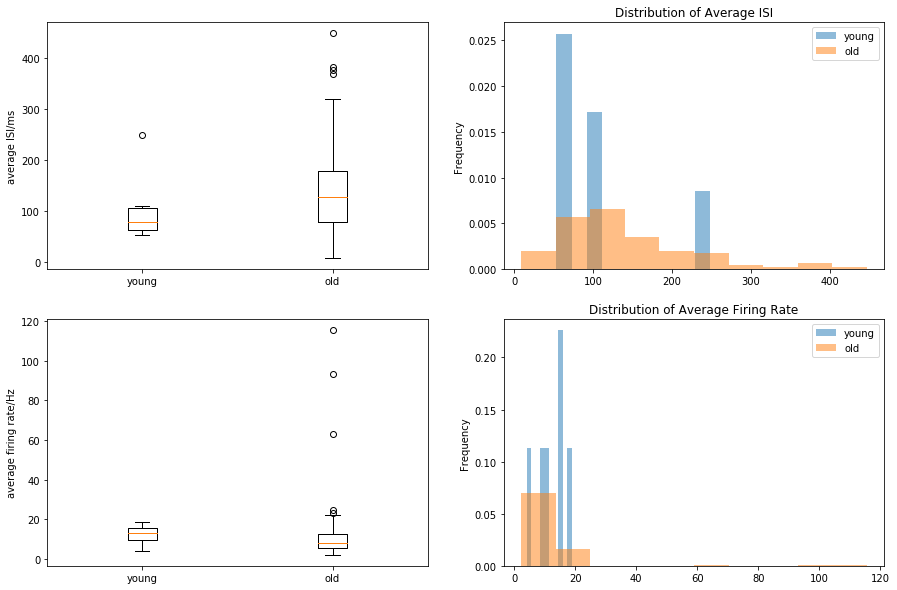

In [25]:
# plot several boxplots data against age category
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

final_ephys_df = final_ephys_df.dropna()

young_group = final_ephys_df[final_ephys_df['age_category'] == 'younger']
old_group = final_ephys_df[final_ephys_df['age_category'] == 'older']

# plot for average isi
young_isi = young_group['avg_isi']
old_isi = old_group['avg_isi']
    
axes[0, 0].boxplot([young_isi, old_isi])
axes[0, 0].set_xticklabels(['young', 'old'])
axes[0, 0].set_ylabel('average ISI/ms')

# plot average isi distribution
axes[0, 1].hist(young_isi, alpha = 0.5,density = True)
axes[0, 1].hist(old_isi, alpha = 0.5,density = True)
axes[0, 1].legend(['young', 'old'])
axes[0, 1].set_title('Distribution of Average ISI')
axes[0,1].set_ylabel('Frequency')
#plot for average firing rate
young_fr = young_group['avg_fr']
old_fr = old_group['avg_fr']
    
axes[1, 0].boxplot([young_fr, old_fr])
axes[1, 0].set_xticklabels(['young', 'old'])
axes[1, 0].set_ylabel('average firing rate/Hz')

# plot average firing rate distribution
axes[1, 1].hist(young_fr, alpha = 0.5,density=True)
axes[1, 1].hist(old_fr, alpha = 0.5,density=True)
axes[1, 1].legend(['young', 'old'])
axes[1, 1].set_title('Distribution of Average Firing Rate')
axes[1,1].set_ylabel('Frequency')

# --> Add description here <--

In [26]:
# doing t-test to determine significance between age groups
print(stats.mannwhitneyu(young_isi, old_isi))
print(stats.mannwhitneyu(young_fr, old_fr))

MannwhitneyuResult(statistic=219.0, pvalue=0.1064892964606044)
MannwhitneyuResult(statistic=219.0, pvalue=0.1064892964606044)


## 3.2. Analyzing gene expression data

To visualize hippocampal expression of Kv4.3 in young and old subjects, I would create a boxplot of the expression values against age.

Text(0.5, 1.0, 'Figure 3. Distribution of KCND3 \n expression of young subjects')

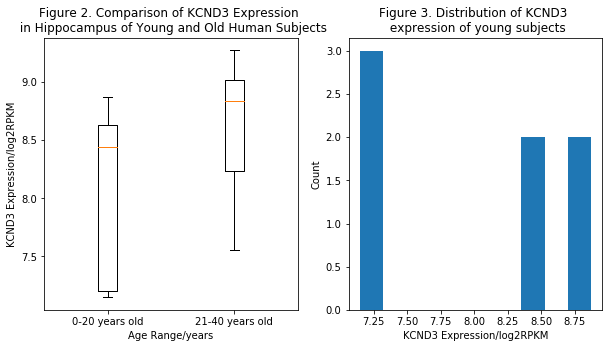

In [27]:
fig,ax = plt.subplots(1,2,figsize = (10,5))
ax[0].boxplot(data)
ax[0].set_xlabel('Age Range/years')
ax[0].set_ylabel('KCND3 Expression/log2RPKM')   
ax[0].set_xticklabels(['0-20 years old','21-40 years old'])
ax[0].set_title('Figure 2. Comparison of KCND3 Expression \n in Hippocampus of Young and Old Human Subjects')
ax[1].hist(young_expression)
ax[1].set_xlabel('KCND3 Expression/log2RPKM') 
ax[1].set_ylabel('Count')
ax[1].set_title('Figure 3. Distribution of KCND3 \n expression of young subjects')

Figure 2 shows that younger subjects have a wider range of KCND3 expression in hippocampus than older subjects. Figure 3 showed that young subjects' expression values are not in a normal distribution. Younger subjects also seem to have lower hippocampal KCND3 expression compared to older subjects. In oder to figure out if such observation is statistically significant, we would like to conduct an Mann-Whitney U Test regarding the two groups' expression values. 

In [29]:
# statistical test across young and old subjects
ttest_statistic, ttest_pVal = stats.mannwhitneyu(young_expression,old_expression)
print ("The p-Value for the t-test is: ", ttest_pVal)
print ('Since the p value is higher than 0.05, we have insufficient evidence to claim that the hippocampal KCND expression of the young\
and old subjects are different.')

The p-Value for the t-test is:  0.06680720126885807
Since the p value is higher than 0.05, we have insufficient evidence to claim that the hippocampal KCND expression of the youngand old subjects are different.


Lastly, we want to concidely show, using a scatterplot, the KCND3 gene expression and average firing rate of hippocampal pyramidal neurons in young and old subjects.

Text(0.5, 1.0, 'Figure 4. Comparison of Hippocampal KCND3 Expression and \nAverage Firing Rate Across Young and Old Human Subjects')

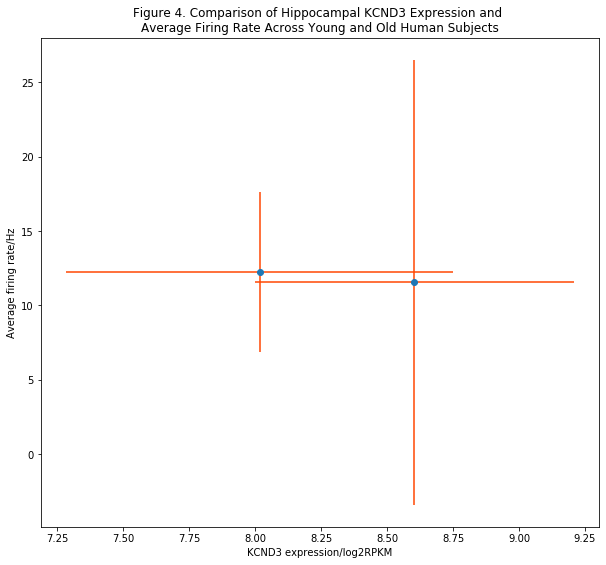

In [57]:
fig,ax = plt.subplots(figsize = (10,9))
young_fr_average = young_fr.mean()
young_fr_std = young_fr.std()
old_fr_average = old_fr.mean()
old_fr_std = old_fr.std()
young_exp_average = sum(young_expression)/len(young_expression)
young_expression_np = np.array(young_expression)
young_exp_std = young_expression_np.std()
old_exp_average = sum(old_expression)/len(old_expression)
old_expression_np = np.array(old_expression)
old_exp_std = old_expression_np.std()
x = [young_exp_average, old_exp_average]
y = [young_fr_average, old_fr_average]
x_errorbar = [young_exp_std,old_exp_std]
y_errorbar = [young_fr_std, old_fr_std]
ax.errorbar(x,y,xerr = x_errorbar, yerr = y_errorbar,fmt = 'o',ecolor = 'orangered')
ax.set_xlabel('KCND3 expression/log2RPKM')
ax.set_ylabel('Average firing rate/Hz')
ax.set_title('Figure 4. Comparison of Hippocampal KCND3 Expression and \nAverage Firing Rate Across Young and Old Human Subjects')

# 4. Conclusion & Discussion

       We conclude that there is no statistical difference of either Kv4.3 expression or any of the electrophysiological parameters examined in hippocampal pyramidal cells between younger (0-20 years old) human subjects and older (21-40 years old) subjects. Therefore, we found that hippocampal neurons in older adults do not have increased excitability compared to those of young adults, and we could not claim any mediation effect of excitability by Kv4.3 expression.
       Several limitations exist for our project. First of all, there was no data precisely for ‘pyramidal neurons in the hippocampus’ in the two datasets we worked with. Regarding potassium channel expression, we were only able to look at the expression data for hippocampus in general. It is known, however, that there are over 47 types of cells in the hippocampus (Zeisel et al. 2015), meaning that general hippocampal KCND3 expression may not accurately represent the expression in pyramidal neurons. Moreover, we were only able to get the electrophysiological data for spiny and non-spiny neurons in the medial temporal gyrus. Indeed, most pyramidal cells are excitatory and generally have spiny structures (Buckmaster 2017), so studying spiny neurons can be a proximate of studying pyramidal cells. On the other hand, many spiny neurons, such as spiny stellate neurons are not pyramidal, and the inclusion on non-pyramidal neurons can deviate our data. These non-specificity will negatively affect the validity of our attempt to correlate gene expression with neuronal electrophysiological properties. 
       In addition, due to the insufficiency of data points available online, we were limited to compare data from two large age groups, instead of focusing on narrower ones. The younger age group in our project consisted of subjects with age ranging from 0 to 20, which covers several significant stages of development from infancy to adulthood. Across these developmental stages, major changes in the hippocampus have also been discovered, including epigenetic changes due to physical activities (Abel and Rissman 2012), which could lead to significant changes in gene expression. Grouping all these developmental stages together ignores these potential changes and can thus make our young-old comparison less informative. 
       Nevertheless, our project has raised interesting questions and suggestions for future studies. 
